In [1]:
import os
from matplotlib import rc
from matplotlib import font_manager

for i in sorted(font_manager.get_font_names()):
    print(i)

rc('font', family='Heiti TC')
os.chdir('/Users/villager/Moo/notebook/data')


.Aqua Kana
.Keyboard
.New York
.SF Arabic
.SF Arabic Rounded
.SF Armenian
.SF Armenian Rounded
.SF Camera
.SF Compact
.SF Compact Rounded
.SF Georgian
.SF Georgian Rounded
.SF Hebrew
.SF Hebrew Rounded
.SF NS Mono
.SF NS Rounded
.SF Soft Numeric
.ThonburiUI
Academy Engraved LET
Adelle Sans Devanagari
AkayaKanadaka
AkayaTelivigala
Al Bayan
Al Nile
Al Tarikh
American Typewriter
Andale Mono
Annai MN
Apple Braille
Apple Chancery
Apple LiGothic
Apple LiSung
Apple SD Gothic Neo
Apple Symbols
AppleGothic
AppleMyungjo
Arial
Arial Black
Arial Hebrew
Arial Narrow
Arial Rounded MT Bold
Arial Unicode MS
Arima Koshi
Arima Madurai
Athelas
Avenir
Avenir Next
Avenir Next Condensed
Ayuthaya
BIZ UDGothic
BIZ UDMincho
BM Dohyeon
BM Hanna 11yrs Old
BM Hanna Air
BM Hanna Pro
BM Jua
BM Kirang Haerang
BM Yeonsung
Baghdad
Bai Jamjuree
Baloo 2
Baloo Bhai 2
Baloo Bhaijaan
Baloo Bhaina 2
Baloo Chettan 2
Baloo Da 2
Baloo Paaji 2
Baloo Tamma 2
Baloo Tammudu 2
Baloo Thambi 2
Bangla MN
Bangla Sangam MN
Baoli SC
Bask

1.4155211372771896

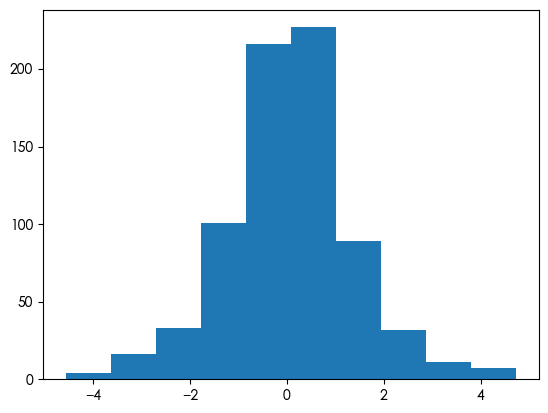

In [2]:
# chap14
import pandas as pd
from matplotlib import pyplot as plt

returns=pd.read_csv('retdata.csv',sep='\t')
returns.head()
returns.tail()
returns.columns

HonHai=returns['Hon Hai Precision']
HonHai.describe()
plt.hist(HonHai)

TSMC = returns['TSMC         ']
UniPresident = returns['Uni-President']

# 平均數
TSMC.mean()
UniPresident.mean()

# 中位數
TSMC.median()
UniPresident.median()

# 眾數
TSMC.mode()
UniPresident.mode()

# 四分位數
[TSMC.quantile(i) for i in [0.25,0.75]]
[UniPresident.quantile(i) for i in [0.25,0.75]]

# 全距
TSMC.max()-TSMC.min()

# 平均絕對偏差 TSMC.mad()
# https://github.com/pandas-dev/pandas/issues/11787
# df.mad(how='median', center='median') would evaluate as abs(df - df.median()).median()
# df.mad(how='median', center='mean') would evaluate as abs(df - df.mean()).median()
# df.mad(how='median', center=15.4) would evaluate as abs(df - 15.4).median()
# df.mad(how='mean', center='median') would evaluate as abs(df - df.median()).mean()
abs(TSMC - TSMC.mean()).median()

# 變異數
TSMC.var()

# 標準差
TSMC.std()

UniPresident.max()-UniPresident.min()
abs(UniPresident - UniPresident.mean()).median()
UniPresident.var()
UniPresident.std()


Text(0.5, 1.0, '臺灣50指數收益率序列的累積分布函數圖')

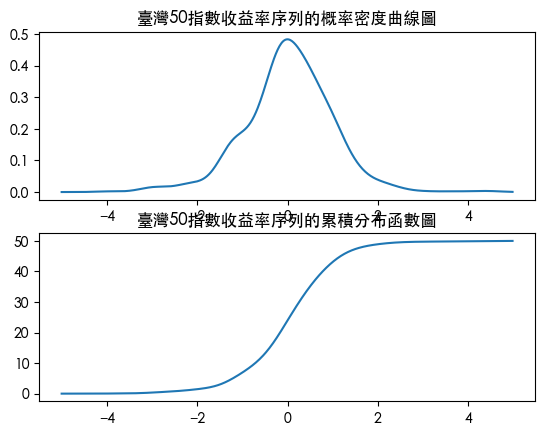

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# 產生隨機數
RandomNumber=np.random.choice([1,2,3,4,5],\
                   size=100,replace=True,\
                   p=[0.1,0.1,0.3,0.3,0.2])
pd.Series(RandomNumber).value_counts()
pd.Series(RandomNumber).value_counts()/100

# 台灣50收益率數據
tw50=pd.read_csv('tw50.csv',sep='\t')
tw50.head(n=2)
tw50.ROI.describe()

density=stats.gaussian_kde(tw50.ROI)

bins=np.arange(-5,5,0.02) # 設定分割區間

plt.subplot(211)
plt.plot(bins,density(bins))
plt.title('臺灣50指數收益率序列的概率密度曲線圖')

plt.subplot(212)
plt.plot(bins,density(bins).cumsum())
plt.title('臺灣50指數收益率序列的累積分布函數圖')


Text(0.5, 1.0, 'Probability Density Plot of Chi-Square Distribution')

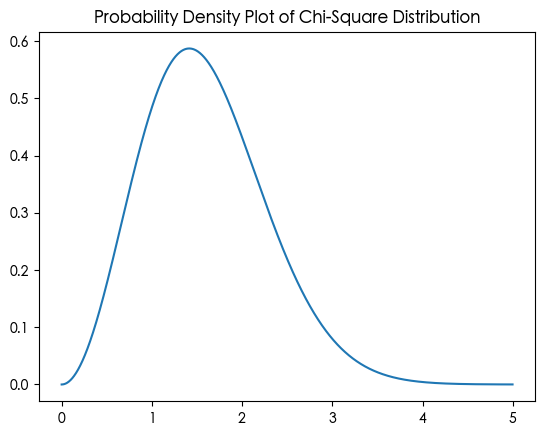

In [5]:
#chap15
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# 二項分布隨機數
np.random.binomial(100,0.5,20)
np.random.binomial(10,0.5,3)

# 一百次試驗 有 20, 50次朝上概率
stats.binom.pmf(20,100,0.5)
stats.binom.pmf(50,100,0.5)

# 求出正面朝上 0, 1, ...,20次概率
dd=stats.binom.pmf(np.arange(0,21,1),100,0.5)
dd
# 將概率相加 為正面朝上次數小於等於20次概率
dd.sum()
# cdf()求解累積密度 應與上相同
stats.binom.cdf(20,100,0.5)

# 台灣50收益率數據
ret=tw50.ROI
ret.index = pd.to_datetime(tw50.Date)
ret1=ret['2016']
ret1.head(n=3)
len(ret1)
len(ret1[ret1>0])
# 估算台灣50指數上漲概率
p=len(ret1[ret1>0])/len(ret1)
p
# 估計10交易日中 有6交易日上漲概率
prob=stats.binom.pmf(6,10,p)
prob

# 產生5個標準常態分佈隨機數
Norm=np.random.normal(size=5)
Norm
# 求產生常態分佈隨機數密度值
stats.norm.pdf(Norm)
# 求產生常態分佈隨機數累積密度值
stats.norm.cdf(Norm)

# 獲得台灣50指數收益率序列的均值和變異數
retMean=ret.mean()
retMean

retVariance=ret.var()
retVariance
# 查詢累積密度值為 0.05的分位數
stats.norm.ppf(0.05,retMean,
  retVariance**0.5)

# 卡方分佈
plt.plot(np.arange(0,5,0.002),\
         stats.chi.pdf(np.arange(0,5,0.002),3))
plt.title('Probability Density Plot of Chi-Square Distribution')


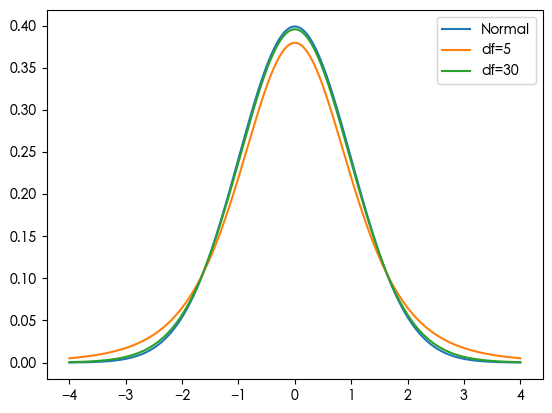

In [41]:

x=np.arange(-4,4.004,0.004)
plt.plot(x,stats.norm.pdf(x),label='Normal')
# t分佈
plt.plot(x,stats.t.pdf(x,5),label='df=5')
plt.plot(x,stats.t.pdf(x,30),label='df=30')
plt.legend()


Text(0.5, 1.0, 'Probability Density Plot of F Distribution')

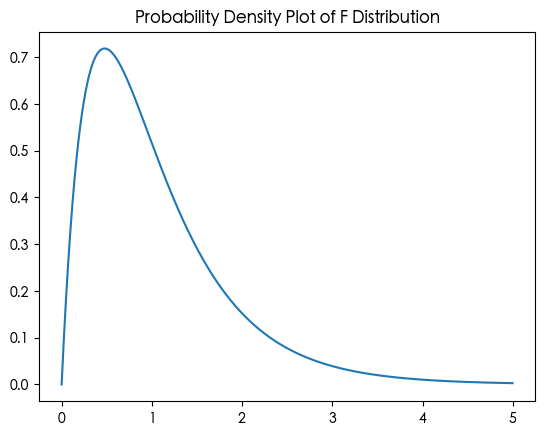

In [6]:

# f分佈
plt.plot(np.arange(0,5,0.002),\
        stats.f.pdf(np.arange(0,5,0.002),4,40))
plt.title('Probability Density Plot of F Distribution')



0.9709016200567359

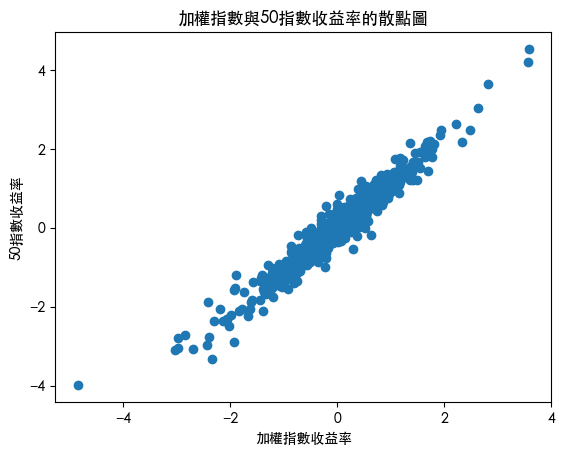

In [7]:
#correlation
# 讀取數據
TRD_Index=pd.read_table('index.csv',sep='\t')
TRD_Index.head()
np.unique(TRD_Index.CoName)
TRD_Index.index = pd.to_datetime(TRD_Index.Date)
# 獲取台灣加權股價指數收益率數據
Taiex=TRD_Index[TRD_Index.CoName=='TSE Taiex    ']
Taiex.head(3)
# 獲取台灣50指數收益率數據
tw50=TRD_Index[TRD_Index.CoName=='TW 50 INDEX  ']
tw50.head(3)
# 合併兩者的日度收益數據
retData = pd.concat([Taiex.ROI,tw50.ROI],axis=1).astype(float)
retData =retData.dropna()
retData.columns=['TAIEX','TW50']
retData.head()

# 繪製甲醛指數與50指數收益率散佈圖
plt.scatter(retData.TAIEX,retData.TW50)
plt.title('加權指數與50指數收益率的散點圖')
plt.xlabel('加權指數收益率')
plt.ylabel('50指數收益率') 
# 計算加權指數與50指數收益率相關係數
retData.TAIEX.corr(retData.TW50)


TtestResult(statistic=-1.602970317044919, pvalue=0.10937083021536068, df=735)

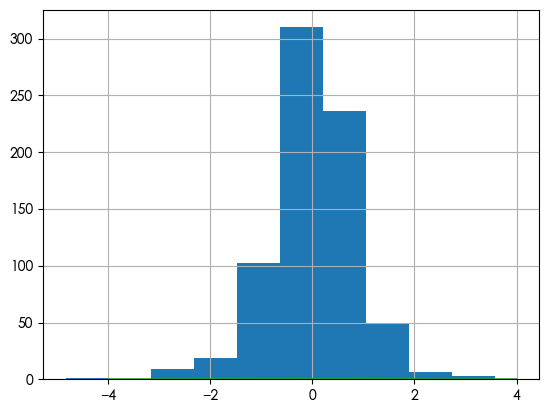

In [8]:
#chap16 
from scipy import stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 構造樣本重量
x=[10.1 ,10 ,9.8 ,10.5 ,9.7,\
   10.1 ,9.9 ,10.2 ,10.3 ,9.9]

# np.mean x均值, stats.sem(x)樣本平均值的標準誤
# 樣本均值服從t分佈 樣本均值的標準差為標準誤
# 在區間估計時 用標準誤表示樣本平均值的標準差
stats.t.interval(0.95,len(x)-1,\
              np.mean(x),stats.sem(x))

# 讀取數據
TRD_Index=pd.read_table('index.csv',sep='\t')
TRD_Index.index = pd.to_datetime(TRD_Index.Date)
# 讀取台灣加權指數的收益率數列
Taiex=TRD_Index[TRD_Index.CoName=='TSE Taiex    ']
Taiex.head(3)
# 繪製台灣加權指數收益率直方圖
TaiexRet = Taiex.ROI.astype(float)
TaiexRet.hist()

# 求出台灣加權指數的收益率均值
mu=TaiexRet.mean()
# 求出台灣加權指數的收益率標準差
sigma=TaiexRet.std()

# 在直方圖上添加常態分佈曲線, TODO fix normed is deprecated
plt.hist(TaiexRet, density=True)
plt.plot(np.arange(-4,4,0.002),\
   stats.norm.pdf(np.arange(-4,4,0.002),\
   mu,sigma))
# 進行區間統計
stats.t.interval(0.95,len(TaiexRet)-1,mu,stats.sem(TaiexRet))

# t檢定 只需輸入檢定的變數及要比較的數值
# p > 0.05 表示無法拒絕虛無假設
# h: 收益率均值為0
stats.ttest_1samp(TaiexRet,0)

# 讀取台灣50指數數據
tw50=TRD_Index[TRD_Index.CoName=='TW 50 INDEX  ']
tw50.head(3)
# 提取台灣中型100指數數據
TM100=TRD_Index[TRD_Index.CoName=='TW MID-CAP INDEX']
TM100.head(3)

retData1 = pd.concat([TM100.ROI,tw50.ROI],axis=1).astype(float)
retData1 =retData1.dropna()
retData1.columns=['TM100','TW50']
# 輸入兩個變數 獨立樣本t檢定
# h: 兩者收益率均值相等
stats.ttest_ind(retData1.TM100,retData1.TW50)

# 進行配對樣本t檢定
# h: 兩者收益率均值相等
retData2 = pd.concat([Taiex.ROI,tw50.ROI],axis=1).astype(float)
retData2 =retData2.dropna()
retData2.columns=['Taiex','TW50']
stats.ttest_rel(retData2.Taiex,retData2.TW50)


In [9]:
#chap17
import pandas as pd
import statsmodels.stats.anova as anova
from statsmodels.formula.api import ols

year_return=pd.read_csv('TRD_Year.csv', encoding='iso-8859-13') # gbk ?
year_return.head()

# 進行變異數分析
# h:不同行業收益率一樣
# p值將遠小於0.05 不同行業收益率不同
model=ols('Return ~ C(Industry)',\
          data=year_return.dropna()).fit()
table1 = anova.anova_lm(model)
print(table1)

# 讀取數據
PSID=pd.read_csv('PSID.csv', )
PSID.head(3)
# 多因素變異數分析
# h:婚姻狀況 教育水平對個人收入無影響
# p值將遠小於0.05 婚姻狀況 教育水平影響收入
model=ols('earnings ~C(married)+C(educatn)',\
           data=PSID.dropna()).fit()
table2 = anova.anova_lm(model)
print(table2)
# 增加兩著乘項
# h:婚姻狀況教育水平不影響收入
# p值將遠小於0.05 婚姻狀況教育水平影響收入
model=ols('earnings ~ C(married)*C(educatn)', data=PSID.dropna()).fit()
table3 = anova.anova_lm(model)
print(table3)


                 df      sum_sq   mean_sq       F        PR(>F)
C(Industry)    74.0   60.975337  0.823991  4.2115  1.793648e-28
Residual     2321.0  454.109778  0.195653     NaN           NaN
                df        sum_sq       mean_sq          F         PR(>F)
C(married)     6.0  1.956487e+10  3.260811e+09  15.551238   9.355695e-18
C(educatn)    19.0  2.082990e+11  1.096311e+10  52.284500  9.947527e-180
Residual    4829.0  1.012553e+12  2.096818e+08        NaN            NaN
                           df        sum_sq       mean_sq          F  \
C(married)                6.0  1.956487e+10  3.260811e+09  15.457276   
C(educatn)               19.0  2.082990e+11  1.096311e+10  51.968591   
C(married):C(educatn)   114.0  2.272286e+10  1.993234e+08   0.944856   
Residual               4745.0  1.000988e+12  2.109564e+08        NaN   

                              PR(>F)  
C(married)              1.227975e-17  
C(educatn)             2.246025e-178  
C(married):C(educatn)   6.467573e-01  

                            OLS Regression Results                            
Dep. Variable:                  TAIEX   R-squared:                       0.943
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                 1.206e+04
Date:                Thu, 11 Jul 2024   Prob (F-statistic):               0.00
Time:                        21:12:30   Log-Likelihood:                 128.80
No. Observations:                 736   AIC:                            -253.6
Df Residuals:                     734   BIC:                            -244.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0105      0.008     -1.405      0.1

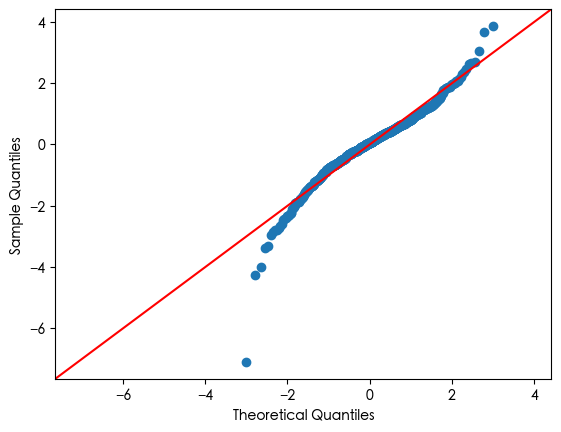

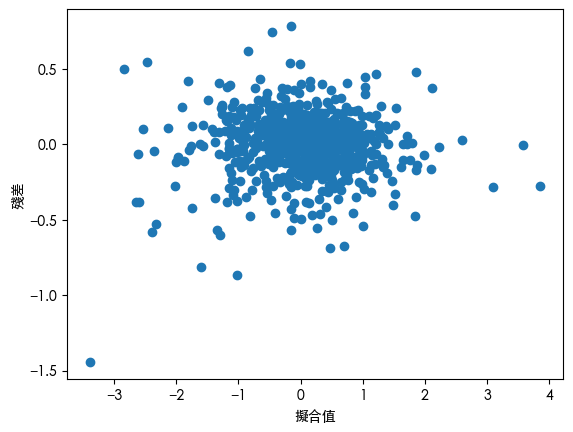

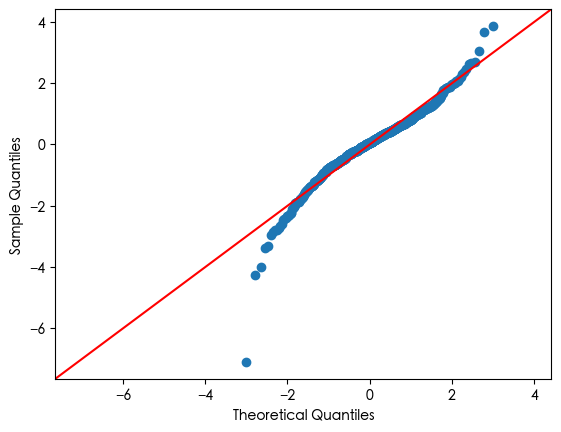

In [10]:
#chap18
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import scipy.stats as stats

# 讀取數據
TRD_Index=pd.read_table('index.csv',sep='\t')
TRD_Index.index = pd.to_datetime(TRD_Index.Date)
Taiex=TRD_Index[TRD_Index.CoName=='TSE Taiex    ']
tw50=TRD_Index[TRD_Index.CoName=='TW 50 INDEX  ']
retData = pd.concat([Taiex.ROI,tw50.ROI],axis=1).astype(float)
retData =retData.dropna()
retData.columns=['TAIEX','TW50']

# 構造台灣加權指數與台灣50指數收益率回歸模型
model=sm.OLS(retData.TAIEX,sm.add_constant(retData.TW50)).fit()
# 查詢回歸模型結果
print(model.summary())
model.fittedvalues[:5]

# 繪製回歸診斷圖
plt.scatter(model.fittedvalues,model.resid)
plt.xlabel('擬合值')
plt.ylabel('殘差')

# 常態qq圖 滿足常態分佈 會落在直線上
sm.qqplot(model.resid_pearson,
              stats.norm,line='45')


/var/folders/qw/phdvn0910l7ccdzt4z3cxz440000gn/T/ipykernel_95052/4266744331.py:3: RuntimeWarning: invalid value encountered in sqrt
  model.resid_pearson**0.5)


Text(0, 0.5, '標准化殘差的平方根')

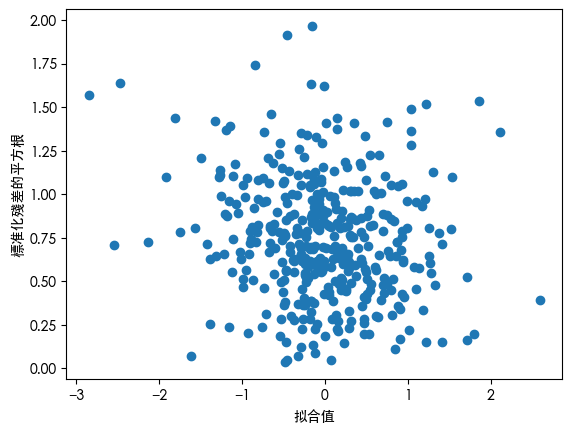

In [11]:
# 變異數同值性 滿足變異數相等的假定 會散佈在一條帶狀上
plt.scatter(model.fittedvalues,\
             model.resid_pearson**0.5)
plt.xlabel('拟合值')
plt.ylabel('標准化殘差的平方根')


In [12]:
# 載入數據
penn=pd.read_excel('Penn World Table.xlsx',2)
# 只關注數據後面變數
penn.head(3)

# 假設我們先放入一個混合模型 即不對變數做過多篩選
# 將 pl_i pl_g pl_m 等五變數都放到回歸模型內
# 對GDP進行對數化 使其符合常態分佈
model=sm.OLS(np.log(penn.rgdpe),
             sm.add_constant(penn.iloc[:,-6:])).fit()

print(model.summary())
# 考量自變數共線性因素的新模型
# 多元回歸假設 自變數之間無共線性
# pl_c pl_k 與其他變數有高相關性
penn.iloc[:,-6:].corr()
# 剔除 pl_c pl_k
model=sm.OLS(np.log(penn.rgdpe),\
             sm.add_constant(penn.iloc[:,-5:-1])).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  rgdpe   R-squared:                       0.291
Model:                            OLS   Adj. R-squared:                  0.286
Method:                 Least Squares   F-statistic:                     56.69
Date:                Thu, 11 Jul 2024   Prob (F-statistic):           9.81e-59
Time:                        21:12:41   Log-Likelihood:                -1670.2
No. Observations:                 835   AIC:                             3354.
Df Residuals:                     828   BIC:                             3388.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4226      0.518     16.254      0.0

# exercise

### history.csv 包含機構EDHEC 提供的1997至2016對衝基金收益數據
* head()
* mean
* median
* mode
* 10 percentile, 90 percentile

* range
* mean absolute deviation
* variance, standard deviation

* discribe()

* 求出新興市場風格對沖基金盈利月份數
* 虧損月份數
* 是否盈利服從二項分佈 估計每月盈餘概率
* 試算2010年 12個月中有6月盈利概率

* 假設所有風格的對沖基金收益率獨立 檢定新興市場和全球宏觀風格收益率是否有顯著差異
* 對兩種風格對沖基金收益率進行配對樣本t檢定


### Bwages.csv 是比利時國內1472個工人工資數據
* 繪製變數 wage 累積分佈直方圖
* 求 wage 的累積分佈函數並繪製累積分佈函數

* 求出在信心0.95下 變數 wage 信賴區間
* 使用樣本均值和變異數繪製變數 wage 擬合的常態分佈概率密度圖 與 wage 的頻率直方圖做比較 看看我的假設是否合理

* 對變數 wage 信行t檢測 h: wage 均值11 信心水準0.95

### managers.csv 提取 HAM1 HAM3 HAM4 組成一組新數據集 MANA
* 求 HAM1 HAM3 HAM4 組內變異 SSE
* 計算 MANA 三個變數的組間變異 SSA
* 計算 MANA 的離差平方和 SST
* 分別求出 SST SSA SSE 的自由度 並說明他們滿足的關係
* 建構顯著性檢定ㄉ的F統計量 求出統計量的值 比較像對應F分佈的分佈位值的大小關係 判斷三者收益率是否存在顯著性的差異

* 對 MANA 進行變異數分析(by python) 與上做比較

### EuStockMarkets.csv 包含歐洲1991到1998年主要股票指數收盤價的日度數據 繪製1996到1998年德國DAX指數和英國FTSE指數的散佈圖

* 以FTSE作自變數 DAX指數作為因數建構回歸模型
* 使用summary()
* 獲得該模型所有擬合值 在散佈圖上繪製該回歸模型擬合曲線

* 繪製回歸診斷圖

### 匯入CPS1988.csv 該數據是1988年3月美國人口普查局調查當前人口數據
* 查詢該數據集的數據結構 解釋每個變數的經濟意義
* 建構以下回歸模型 log(wage) = beta1 + beta2 * experience + beta3 * education + beta4 * ethnicity + err
* 使用summary()
* 列出模型擬合值

* 建構以下回歸模型 log(wage) = beta1 +  beta2 * experience + beta2 * experience^2 + beta4 * education + beta5 * ethnicity + err
* 使用summary()
* 比較兩回歸模型結果

* 對上模型進行回歸模型顯著性檢測 h: beta1 = beta2 = ... = beta5 = 0
* 對模型參數 beta3 進行顯著性檢定 h: beta3 = 0
